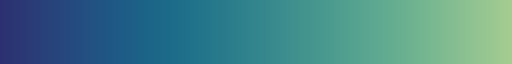

In [1]:
import seaborn as sns
sns.color_palette("crest_r", as_cmap=True)

In [97]:
import pandas as pd

samples = pd.read_parquet('processed_data.parquet')

num_samples, num_features = samples.shape

samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284168 entries, 0 to 142149
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           284168 non-null  int64         
 1   p0_id           284168 non-null  float64       
 2   p0_seed         284168 non-null  float64       
 3   p0_entry        284168 non-null  object        
 4   p0_name         284168 non-null  object        
 5   p0_hand         284168 non-null  object        
 6   p0_ht           284168 non-null  float64       
 7   p0_ioc          284168 non-null  object        
 8   p0_age          284168 non-null  float64       
 9   p0_rank         284168 non-null  float64       
 10  p0_rank_points  284168 non-null  float64       
 11  p1_id           284168 non-null  float64       
 12  p1_seed         284168 non-null  float64       
 13  p1_entry        284168 non-null  object        
 14  p1_name         284168 non-null  object  

In [28]:
samples.describe() 

,index,p0_id,p0_seed,p0_ht,p0_age,p0_rank,p0_rank_points,p1_id,p1_seed,p1_ht,p1_age,p1_rank,p1_rank_points,draw_size,tourney_date,best_of
count,284168.000000,284168.000000,284168.000000,284168.000000,284168.000000,284168.000000,284168.000000,284168.000000,284168.000000,284168.000000,284168.000000,284168.000000,284168.000000,284168.000000,284168,284168.000000
mean,374023.151403,8607.442675,55.236726,176.918234,24.631590,160.333584,1045.075716,8857.445187,61.309148,176.518162,24.644557,200.097745,641.266434,67.587244,2013-03-10 04:25:40.497170944,3.229456
min,155.000000,1.000000,1.000000,152.000000,14.000000,0.000000,0.000000,1.000000,1.000000,145.000000,14.000000,0.000000,0.000000,2.000000,2000-01-17 00:00:00,3.000000
25%,171619.750000,2557.000000,32.000000,171.938097,21.400000,37.000000,207.000000,2730.000000,32.000000,171.938097,21.300000,54.000000,132.000000,32.000000,2007-11-19 00:00:00,3.000000
50%,396871.500000,9138.000000,32.000000,175.000000,24.300000,115.000000,447.000000,9175.000000,32.000000,174.000000,24.300000,136.000000,330.000000,56.000000,2013-05-27 00:00:00,3.000000
75%,557192.000000,9753.000000,96.000000,183.000000,27.400000,205.000000,1071.000000,9958.250000,128.000000,183.000000,27.500000,246.000000,754.000000,128.000000,2019-01-14 00:00:00,3.000000
max,741654.000000,28147.000000,128.000000,211.000000,53.000000,2101.000000,16950.000000,28147.000000,128.000000,211.000000,76.400000,2147.000000,16950.000000,128.000000,2023-12-11 00:00:00,5.000000
std,218144.287677,5884.483776,45.619326,8.634218,4.307507,183.236645,1686.811128,6115.110724,46.176656,8.450268,4.754514,226.717592,994.627372,46.042707,NaN,0.637388


### Reducción de features/dimensionalidad por jugador

In [98]:
player_data = ['_seed', '_entry', '_hand', '_ht', '_ioc', '_age', '_rank', '_rank_points']
p0 = ['p0'+attr for attr in player_data]
p1 = ['p1'+attr for attr in player_data]
p_attr = pd.concat([samples[p0].rename(columns = dict(zip(p0,player_data))), samples[p1].rename(columns = dict(zip(p1,player_data)))], axis=0)
p_attr.head()

,_seed,_entry,_hand,_ht,_ioc,_age,_rank,_rank_points
0,128.0,Q,R,170.0,BEL,21.0,120.0,319.0
1,3.0,DIR,R,185.0,USA,28.4,3.0,2419.0
2,128.0,DIR,L,175.0,MAR,26.2,41.0,800.0
3,128.0,DIR,R,185.0,FRA,23.7,34.0,877.0
4,16.0,DIR,R,196.0,AUS,23.1,19.0,1258.0


In [99]:
## ENTRADA 
## el orden se ha elegido a mas avanzado el tournement
p_attr._entry = p_attr._entry.apply(lambda x : { 'LL':-2, 'ALT': -1, 
                                                'SE': 0, 'WC':0, 'ALT':0, 'JE':0, 
                                                'PR': 1, 'DIR':1, 'Q':2,  'W':3, }.get(x,x))

In [100]:
## MANO 

p_attr['L'] = p_attr._hand.isin(['L', 'A']).astype('Int8')
p_attr['R'] = p_attr._hand.isin(['R', 'A']).astype('Int8')
p_attr = p_attr.drop(columns='_hand')

Para representar los paises, se ha decidio emplear las geolocalizaciones, para ello leemos rapidamente el archivo obtenido de <a href='https://github.com/google/dspl/tree/master'> google Dataset Publishing Language </a>

<script src="https://gist.github.com/tadast/8827699.js"></script>

In [102]:
## COUNTRY 

# archivo CSV
ioc_data = pd.read_csv("countries_codes_and_coordinates.csv")
ioc_data['Alpha-2 code'] = ioc_data['Alpha-2 code'].str.replace(r"[^\w]", "", regex=True)
ioc_data['Alpha-3 code'] = ioc_data['Alpha-3 code'].str.replace(r"[^\w]", "", regex=True)
ioc_data['Latitude (average)'] = ioc_data['Latitude (average)'].str.replace(r'[\b|\"]', "", regex=True).astype(float)
ioc_data['Longitude (average)'] = ioc_data['Longitude (average)'].str.replace(r'[\b|\"]', "", regex=True).astype(float)
ioc_data.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,"""4""",33.000000,65.0
1,Åland Islands,AX,ALA,"""248""",60.116667,19.9
2,Albania,AL,ALB,"""8""",41.000000,20.0
3,Algeria,DZ,DZA,"""12""",28.000000,3.0
4,American Samoa,AS,ASM,"""16""",-14.333300,-170.0


In [103]:
p_attr['_ioc'] = p_attr._ioc.map(lambda x : {'ZA': 'ZAF'}.get(x, x)) 

In [104]:
merged = p_attr.merge(ioc_data[['Alpha-3 code', 'Latitude (average)', 'Longitude (average)']],
                       left_on='_ioc', right_on='Alpha-3 code', how='left')
merged.head()

,_seed,_entry,_ht,_ioc,_age,_rank,_rank_points,L,R,Alpha-3 code,Latitude (average),Longitude (average)
0,128.0,2,170.0,BEL,21.0,120.0,319.0,0,1,BEL,50.8333,4.0
1,3.0,1,185.0,USA,28.4,3.0,2419.0,0,1,USA,38.0000,-97.0
2,128.0,1,175.0,MAR,26.2,41.0,800.0,1,0,MAR,32.0000,-5.0
3,128.0,1,185.0,FRA,23.7,34.0,877.0,0,1,FRA,46.0000,2.0
4,16.0,1,196.0,AUS,23.1,19.0,1258.0,0,1,AUS,-27.0000,133.0


In [105]:
p_attr = merged.drop(columns = ['Alpha-3 code', '_ioc']).rename(
    columns={'Latitude (average)':'ioc_lat', 'Longitude (average)':'ioc_long'})

In [106]:
# selection of data for player
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)

In [107]:
for col in p_attr.columns:
    try: 
        p_attr[col] = p_attr[col].astype(float)
    except ValueError: 
        p_attr = p_attr.drop(columns = col)

    if p_attr[col].isna().any():
        print(col)
        print(p_attr.loc[p_attr[col].isna(), '_ioc'].unique())

In [110]:
import matplotlib.pyplot as plt

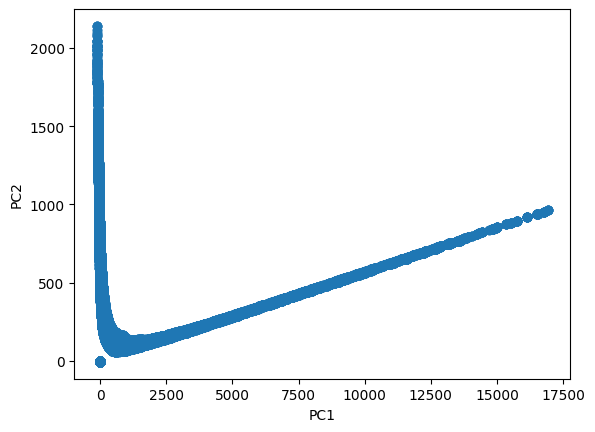

In [112]:
pca_transformed = pca.fit_transform(p_attr)
# Extract PCs
pc1 = pca.components_[0]
pc2 = pca.components_[1]

# Visualize data
plt.scatter(p_attr.dot(pc1), p_attr.dot(pc2))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [113]:
tsne = TSNE(n_components=2)  # Set perplexity

tsne_transformed = tsne.fit_transform(p_attr)

aaa

KeyboardInterrupt: 